In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd 
import os
from time import sleep

In [38]:

def api_call():
    
    url = "https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest"
    
    parameters = {
      'start':'1',
      'limit':'25',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY' : '10607912-d08b-40ce-9d3b-d11713fe12f9'
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    # Set_option to display max columns
    pd.set_option('display.max_columns',None)

    df = pd.json_normalize(data['data'])
    # Adding a timestamp column to know when we pulled the data
    df['Timestamp'] = pd.Timestamp.now()
    
    if not os.path.isfile('cryptoPull.csv'):
        df.to_csv('cryptoPull.csv', header='column_names')
    else:
        df.to_csv('cryptoPull.csv', header=False, mode='a')

    

In [ ]:
#Because we have only 333 calls per day we set our for loop to run 300 times
for i in range(300):
    api_call()
    print("Successful API call")
    sleep(300) # Sleep for 5 minute
exit()


Successful API call
Successful API call
Successful API call
Successful API call
Successful API call
Successful API call
Successful API call
Successful API call
Successful API call
Successful API call
Successful API call
Successful API call
Successful API call
Successful API call


In [3]:
pd.set_option('display.float_format',"{:.2f}".format)

df = pd.read_csv('cryptoPull.csv')

In [4]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10189,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19357212.00,...,46.77,609291082682.98,NaN,2023-04-27T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-27 05:43:21.152738
1,1,1027,Ethereum,ETH,ethereum,6788,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120402439.83,...,19.12,229647143067.77,NaN,2023-04-27T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-27 05:43:21.152738
2,2,825,Tether,USDT,tether,51989,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,81591507219.79,...,6.79,85101814179.89,NaN,2023-04-27T02:42:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-27 05:43:21.152738
3,3,1839,BNB,BNB,bnb,1291,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155863468.46,...,4.32,51897528179.59,NaN,2023-04-27T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-27 05:43:21.152738
4,4,3408,USD Coin,USDC,usd-coin,12030,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30751611897.69,...,2.56,30752668613.96,NaN,2023-04-27T02:42:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-27 05:43:21.152738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,20,3794,Cosmos,ATOM,cosmos,439,2019-03-14T00:00:00.000Z,"['platform', 'cosmos-ecosystem', 'content-crea...",NaN,286370297.00,...,0.27,0.00,NaN,2023-04-27T03:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-27 06:48:35.312867
346,21,7083,Uniswap,UNI,uniswap,666,2020-09-17T00:00:00.000Z,"['decentralized-exchange-dex-token', 'defi', '...",1000000000.00,577501036.00,...,0.26,5448694438.99,4146445086.75,2023-04-27T03:47:00.000Z,1027.00,Ethereum,ETH,ethereum,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,2023-04-27 06:48:35.312867
347,22,328,Monero,XMR,monero,211,2014-05-21T00:00:00.000Z,"['mineable', 'pow', 'medium-of-exchange', 'pri...",NaN,18271095.07,...,0.24,2878796494.89,NaN,2023-04-27T03:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-27 06:48:35.312867
348,23,3897,OKB,OKB,okb,95,2019-04-30T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'disco...",NaN,60000000.00,...,0.24,14379589394.39,NaN,2023-04-27T03:47:00.000Z,1027.00,Ethereum,ETH,ethereum,0x75231f58b43240c9718dd58b4967c5114342a86c,2023-04-27 06:48:35.312867


In [5]:
df = df.rename(columns={'quote.USD.percent_change_1h' : '1h', 'quote.USD.percent_change_24h' : '24h', 'quote.USD.percent_change_7d' : '7d','quote.USD.percent_change_30d' : '30d', 'quote.USD.percent_change_60d' : '60d', 'quote.USD.percent_change_90d' : '90d'})
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10189,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19357212.00,...,46.77,609291082682.98,NaN,2023-04-27T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-27 05:43:21.152738
1,1,1027,Ethereum,ETH,ethereum,6788,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120402439.83,...,19.12,229647143067.77,NaN,2023-04-27T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-27 05:43:21.152738
2,2,825,Tether,USDT,tether,51989,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,81591507219.79,...,6.79,85101814179.89,NaN,2023-04-27T02:42:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-27 05:43:21.152738
3,3,1839,BNB,BNB,bnb,1291,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155863468.46,...,4.32,51897528179.59,NaN,2023-04-27T02:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-27 05:43:21.152738
4,4,3408,USD Coin,USDC,usd-coin,12030,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,30751611897.69,...,2.56,30752668613.96,NaN,2023-04-27T02:42:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-27 05:43:21.152738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,20,3794,Cosmos,ATOM,cosmos,439,2019-03-14T00:00:00.000Z,"['platform', 'cosmos-ecosystem', 'content-crea...",NaN,286370297.00,...,0.27,0.00,NaN,2023-04-27T03:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-27 06:48:35.312867
346,21,7083,Uniswap,UNI,uniswap,666,2020-09-17T00:00:00.000Z,"['decentralized-exchange-dex-token', 'defi', '...",1000000000.00,577501036.00,...,0.26,5448694438.99,4146445086.75,2023-04-27T03:47:00.000Z,1027.00,Ethereum,ETH,ethereum,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,2023-04-27 06:48:35.312867
347,22,328,Monero,XMR,monero,211,2014-05-21T00:00:00.000Z,"['mineable', 'pow', 'medium-of-exchange', 'pri...",NaN,18271095.07,...,0.24,2878796494.89,NaN,2023-04-27T03:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-27 06:48:35.312867
348,23,3897,OKB,OKB,okb,95,2019-04-30T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'disco...",NaN,60000000.00,...,0.24,14379589394.39,NaN,2023-04-27T03:47:00.000Z,1027.00,Ethereum,ETH,ethereum,0x75231f58b43240c9718dd58b4967c5114342a86c,2023-04-27 06:48:35.312867


In [6]:
dfgroup = df.groupby('name', sort=False)[['1h','24h','7d','30d','60d','90d']].mean()



In [7]:
dfgroup

,1h,24h,7d,30d,60d,90d
name,,,,,,
Bitcoin,0.24,2.12,0.59,7.35,24.85,26.99
Ethereum,0.14,1.99,-1.98,11.25,18.97,21.16
Tether,-0.00,-0.01,-0.03,0.02,0.00,-0.00
BNB,0.03,-1.79,2.84,7.45,9.72,9.88
USD Coin,-0.00,-0.00,0.01,0.05,-0.02,-0.01
XRP,0.12,-1.24,-5.90,-2.77,22.44,14.33
Cardano,-0.23,2.65,-2.66,17.69,12.43,8.90
Dogecoin,0.04,-0.20,-10.32,10.37,-1.67,-5.90
Polygon,-0.05,0.32,-7.70,-3.34,-20.53,-7.24


In [8]:
dfstacked = dfgroup.stack()
dfstacked

name                 
Bitcoin           1h     0.24
                  24h    2.12
                  7d     0.59
                  30d    7.35
                  60d   24.85
                         ... 
Ethereum Classic  24h   -0.20
                  7d    -3.35
                  30d   -1.20
                  60d   -6.95
                  90d   -8.37
Length: 150, dtype: float64

In [9]:
# Output of stack() function is a Series so we have to turn it back to DataFrame for easy-to- e purposes
dfstacked = dfstacked.to_frame(name='Values')
dfstacked

Values
name                        
Bitcoin          1h     0.24
                 24h    2.12
                 7d     0.59
                 30d    7.35
                 60d   24.85
...                      ...
Ethereum Classic 24h   -0.20
                 7d    -3.35
                 30d   -1.20
                 60d   -6.95
                 90d   -8.37

[150 rows x 1 columns]

In [11]:
#Create index trick because  dfstacked = dfstacked.set_index(dfstacked['name']) is not working
index = pd.Index(range(150)) # range as much as our rows

dfIn = dfstacked.set_index(index)
dfIn = dfstacked.reset_index()
dfIn

,name,level_1,Values
0,Bitcoin,1h,0.24
1,Bitcoin,24h,2.12
2,Bitcoin,7d,0.59
3,Bitcoin,30d,7.35
4,Bitcoin,60d,24.85
...,...,...,...
145,Ethereum Classic,24h,-0.20
146,Ethereum Classic,7d,-3.35
147,Ethereum Classic,30d,-1.20
148,Ethereum Classic,60d,-6.95


In [12]:
dfIn = dfIn.rename(columns={'level_1' : 'TimeChanges'})
dfIn

,name,TimeChanges,Values
0,Bitcoin,1h,0.24
1,Bitcoin,24h,2.12
2,Bitcoin,7d,0.59
3,Bitcoin,30d,7.35
4,Bitcoin,60d,24.85
...,...,...,...
145,Ethereum Classic,24h,-0.20
146,Ethereum Classic,7d,-3.35
147,Ethereum Classic,30d,-1.20
148,Ethereum Classic,60d,-6.95


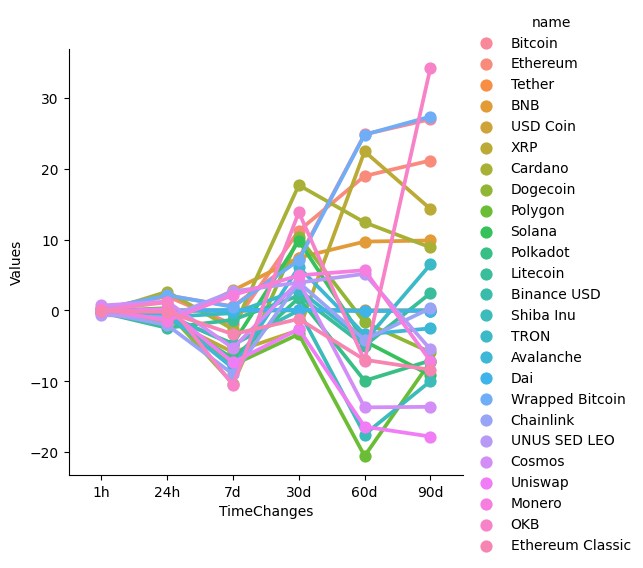

In [13]:
import seaborn as sns

sns.catplot(x='TimeChanges', y='Values', hue='name', data=dfIn, kind='point')
# REMEMBER TO CHECK OTHER VALUES OF KIND --> 'strip', 'swarm', 'box', 'violin', 'boxen', 'point', or 'bar''

In [15]:
subDf = df[['name','quote.USD.price','Timestamp']]
subDf = subDf.query("name == 'Bitcoin'")
subDf

,name,quote.USD.price,Timestamp
0,Bitcoin,29013.86,2023-04-27 05:43:21.152738
25,Bitcoin,28958.07,2023-04-27 05:48:22.067722
50,Bitcoin,29034.16,2023-04-27 05:53:23.130817
75,Bitcoin,29046.38,2023-04-27 05:58:24.179070
100,Bitcoin,29042.62,2023-04-27 06:03:24.940873
125,Bitcoin,28975.96,2023-04-27 06:08:26.507545
150,Bitcoin,28908.54,2023-04-27 06:13:27.573092
175,Bitcoin,28908.82,2023-04-27 06:18:28.534221
200,Bitcoin,28948.71,2023-04-27 06:23:29.596202
225,Bitcoin,28971.19,2023-04-27 06:28:30.654396


In [16]:
# Change this format '2023-04-18 12:48:27.345388' to this '2023-04-18 12:48'
subDf['Timestamp'] = pd.to_datetime(subDf['Timestamp'])
subDf['Timestamp'] = subDf['Timestamp'].dt.strftime('%Y-%m-%d %H:%M')

subDf

,name,quote.USD.price,Timestamp
0,Bitcoin,29013.86,2023-04-27 05:43
25,Bitcoin,28958.07,2023-04-27 05:48
50,Bitcoin,29034.16,2023-04-27 05:53
75,Bitcoin,29046.38,2023-04-27 05:58
100,Bitcoin,29042.62,2023-04-27 06:03
125,Bitcoin,28975.96,2023-04-27 06:08
150,Bitcoin,28908.54,2023-04-27 06:13
175,Bitcoin,28908.82,2023-04-27 06:18
200,Bitcoin,28948.71,2023-04-27 06:23
225,Bitcoin,28971.19,2023-04-27 06:28


C:\Users\panos\AppData\Local\Temp\ipykernel_10404\3580370572.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  lineplot.set_xticklabels(lineplot.get_xticklabels(), rotation=45)


[Text(0, 0, '2023-04-27 05:43'),
 Text(1, 0, '2023-04-27 05:48'),
 Text(2, 0, '2023-04-27 05:53'),
 Text(3, 0, '2023-04-27 05:58'),
 Text(4, 0, '2023-04-27 06:03'),
 Text(5, 0, '2023-04-27 06:08'),
 Text(6, 0, '2023-04-27 06:13'),
 Text(7, 0, '2023-04-27 06:18'),
 Text(8, 0, '2023-04-27 06:23'),
 Text(9, 0, '2023-04-27 06:28'),
 Text(10, 0, '2023-04-27 06:33'),
 Text(11, 0, '2023-04-27 06:38'),
 Text(12, 0, '2023-04-27 06:43'),
 Text(13, 0, '2023-04-27 06:48')]

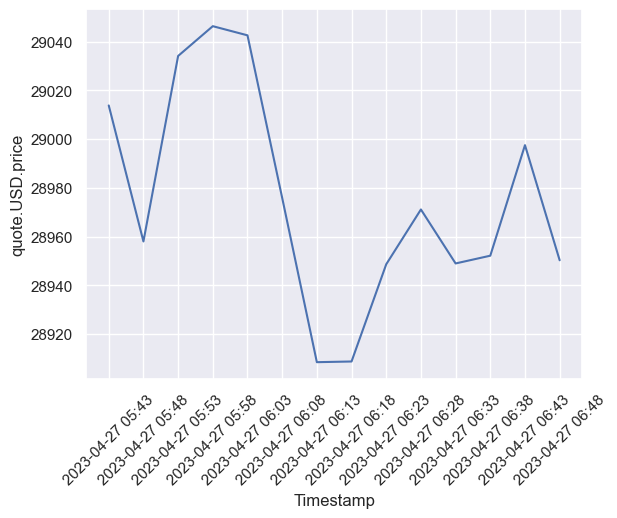

In [17]:
sns.set_theme(style="darkgrid")

lineplot = sns.lineplot(x='Timestamp', y='quote.USD.price', data=subDf)
lineplot.set_xticklabels(lineplot.get_xticklabels(), rotation=45)